Data import

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing  import LabelEncoder
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier

# warnings ignore
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=UserWarning)


df = pd.read_excel('../models/bank.xlsx')

In [65]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<AxesSubplot:xlabel='age', ylabel='Density'>

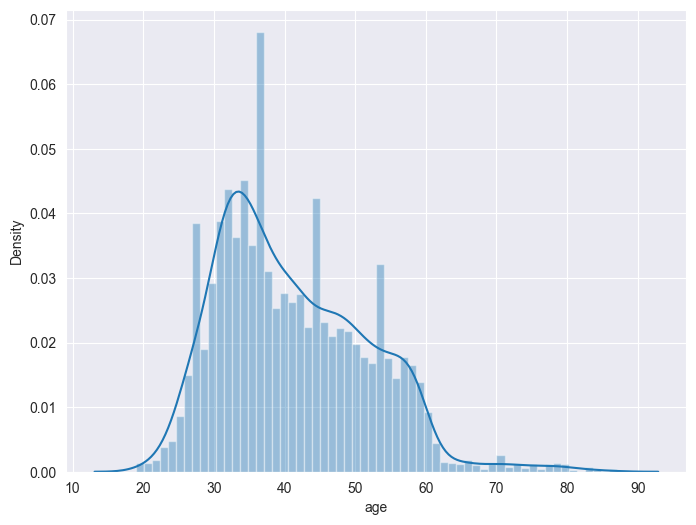

In [66]:
plt.figure(figsize=(8,6))
seaborn.distplot(df['age'],bins= 60)

<AxesSubplot:xlabel='job', ylabel='balance'>

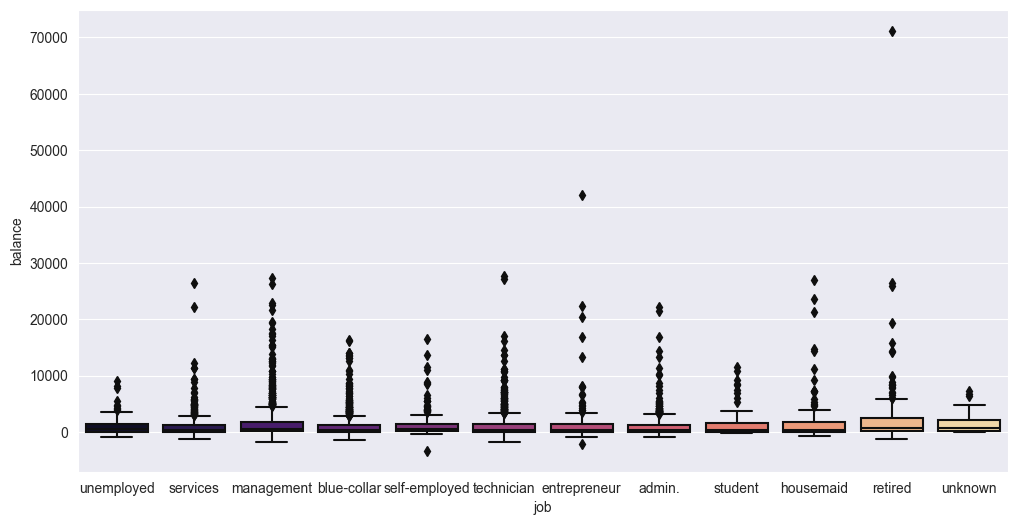

In [67]:
plt.figure(figsize=(12,6))
seaborn.boxplot(y='balance',x='job',data=df,palette='magma')

In [68]:
df.drop(df[(df['balance']>30000)].index, axis=0, inplace=True)

<AxesSubplot:xlabel='job', ylabel='balance'>

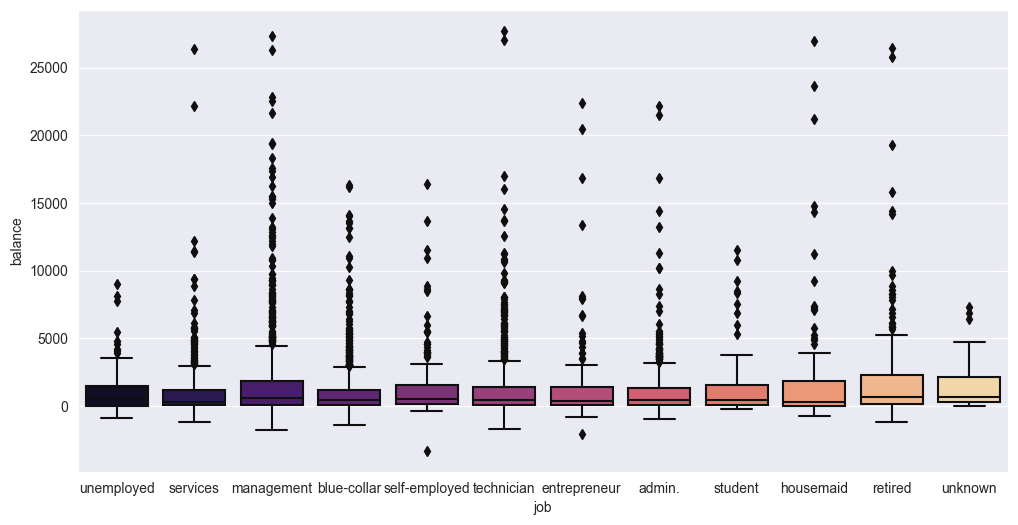

In [69]:
plt.figure(figsize=(12,6))
seaborn.boxplot(y='balance',x='job',data=df,palette='magma')

Data encoding

In [70]:
lb = LabelEncoder()
not_number_columns = [1,2,3,4,6,7,8,10,15,16]
for i in not_number_columns:
    df.iloc[:, i] = lb.fit_transform(df.iloc[:, i])
del lb

C:\Users\a\AppData\Local\Temp\ipykernel_9840\4244093868.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, i] = lb.fit_transform(df.iloc[:, i])


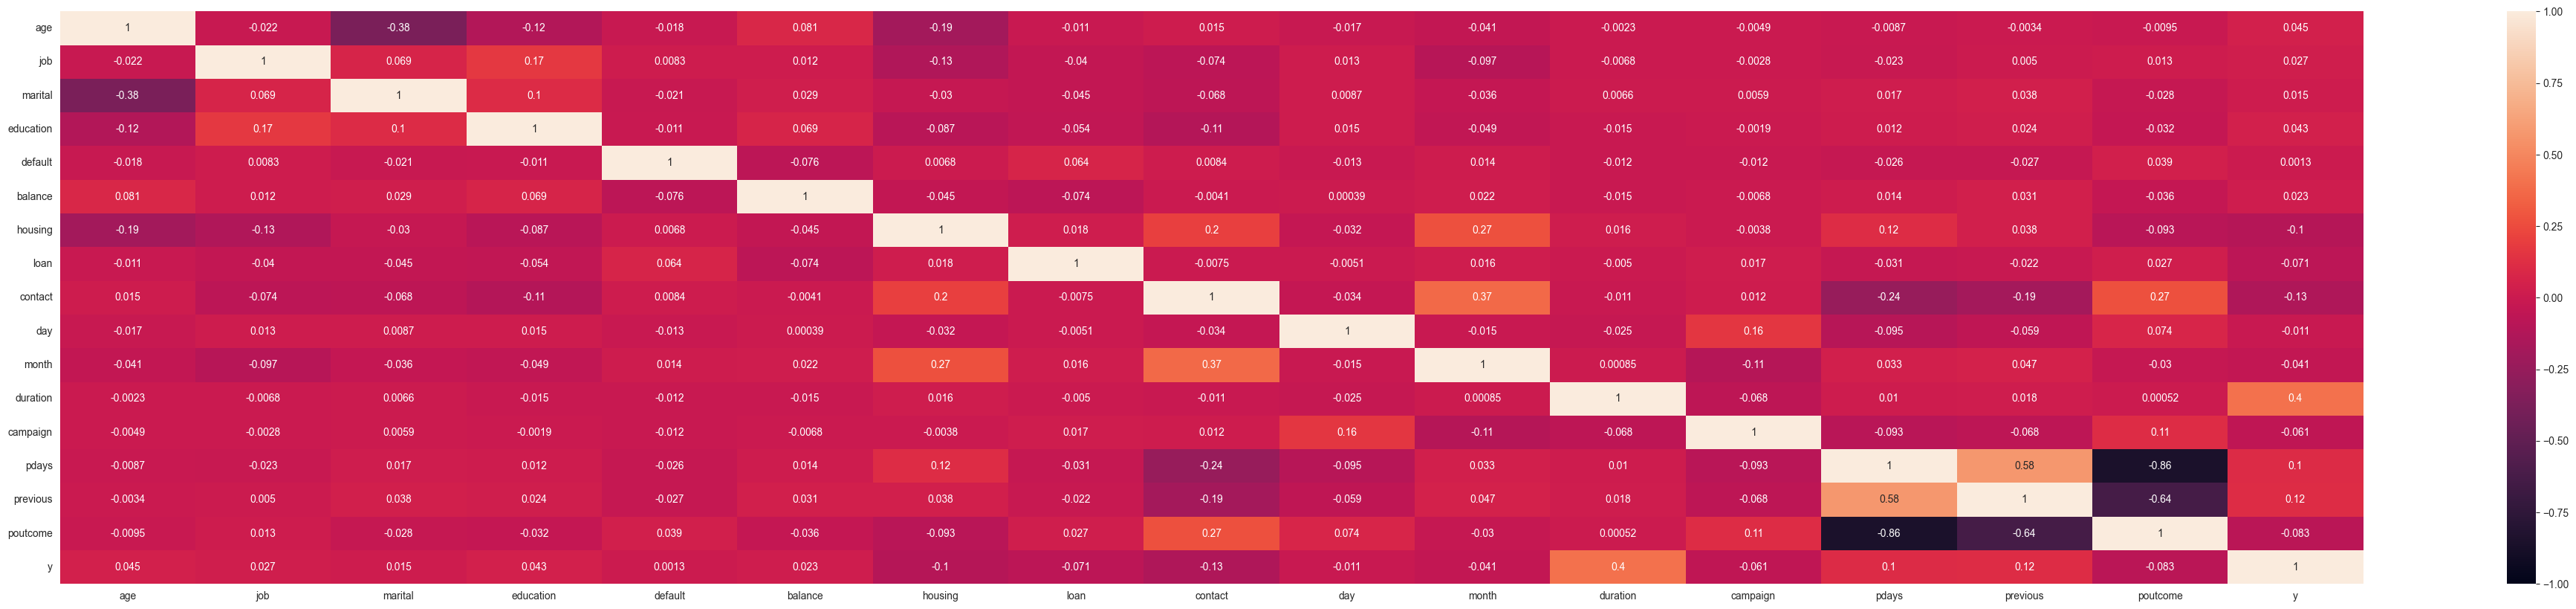

In [71]:
corr_matrix = df.corr()
seaborn.heatmap(corr_matrix, annot=True, vmin=-1.0, vmax=1.0)
plt.rcParams["figure.figsize"] = (50,10)
plt.show()

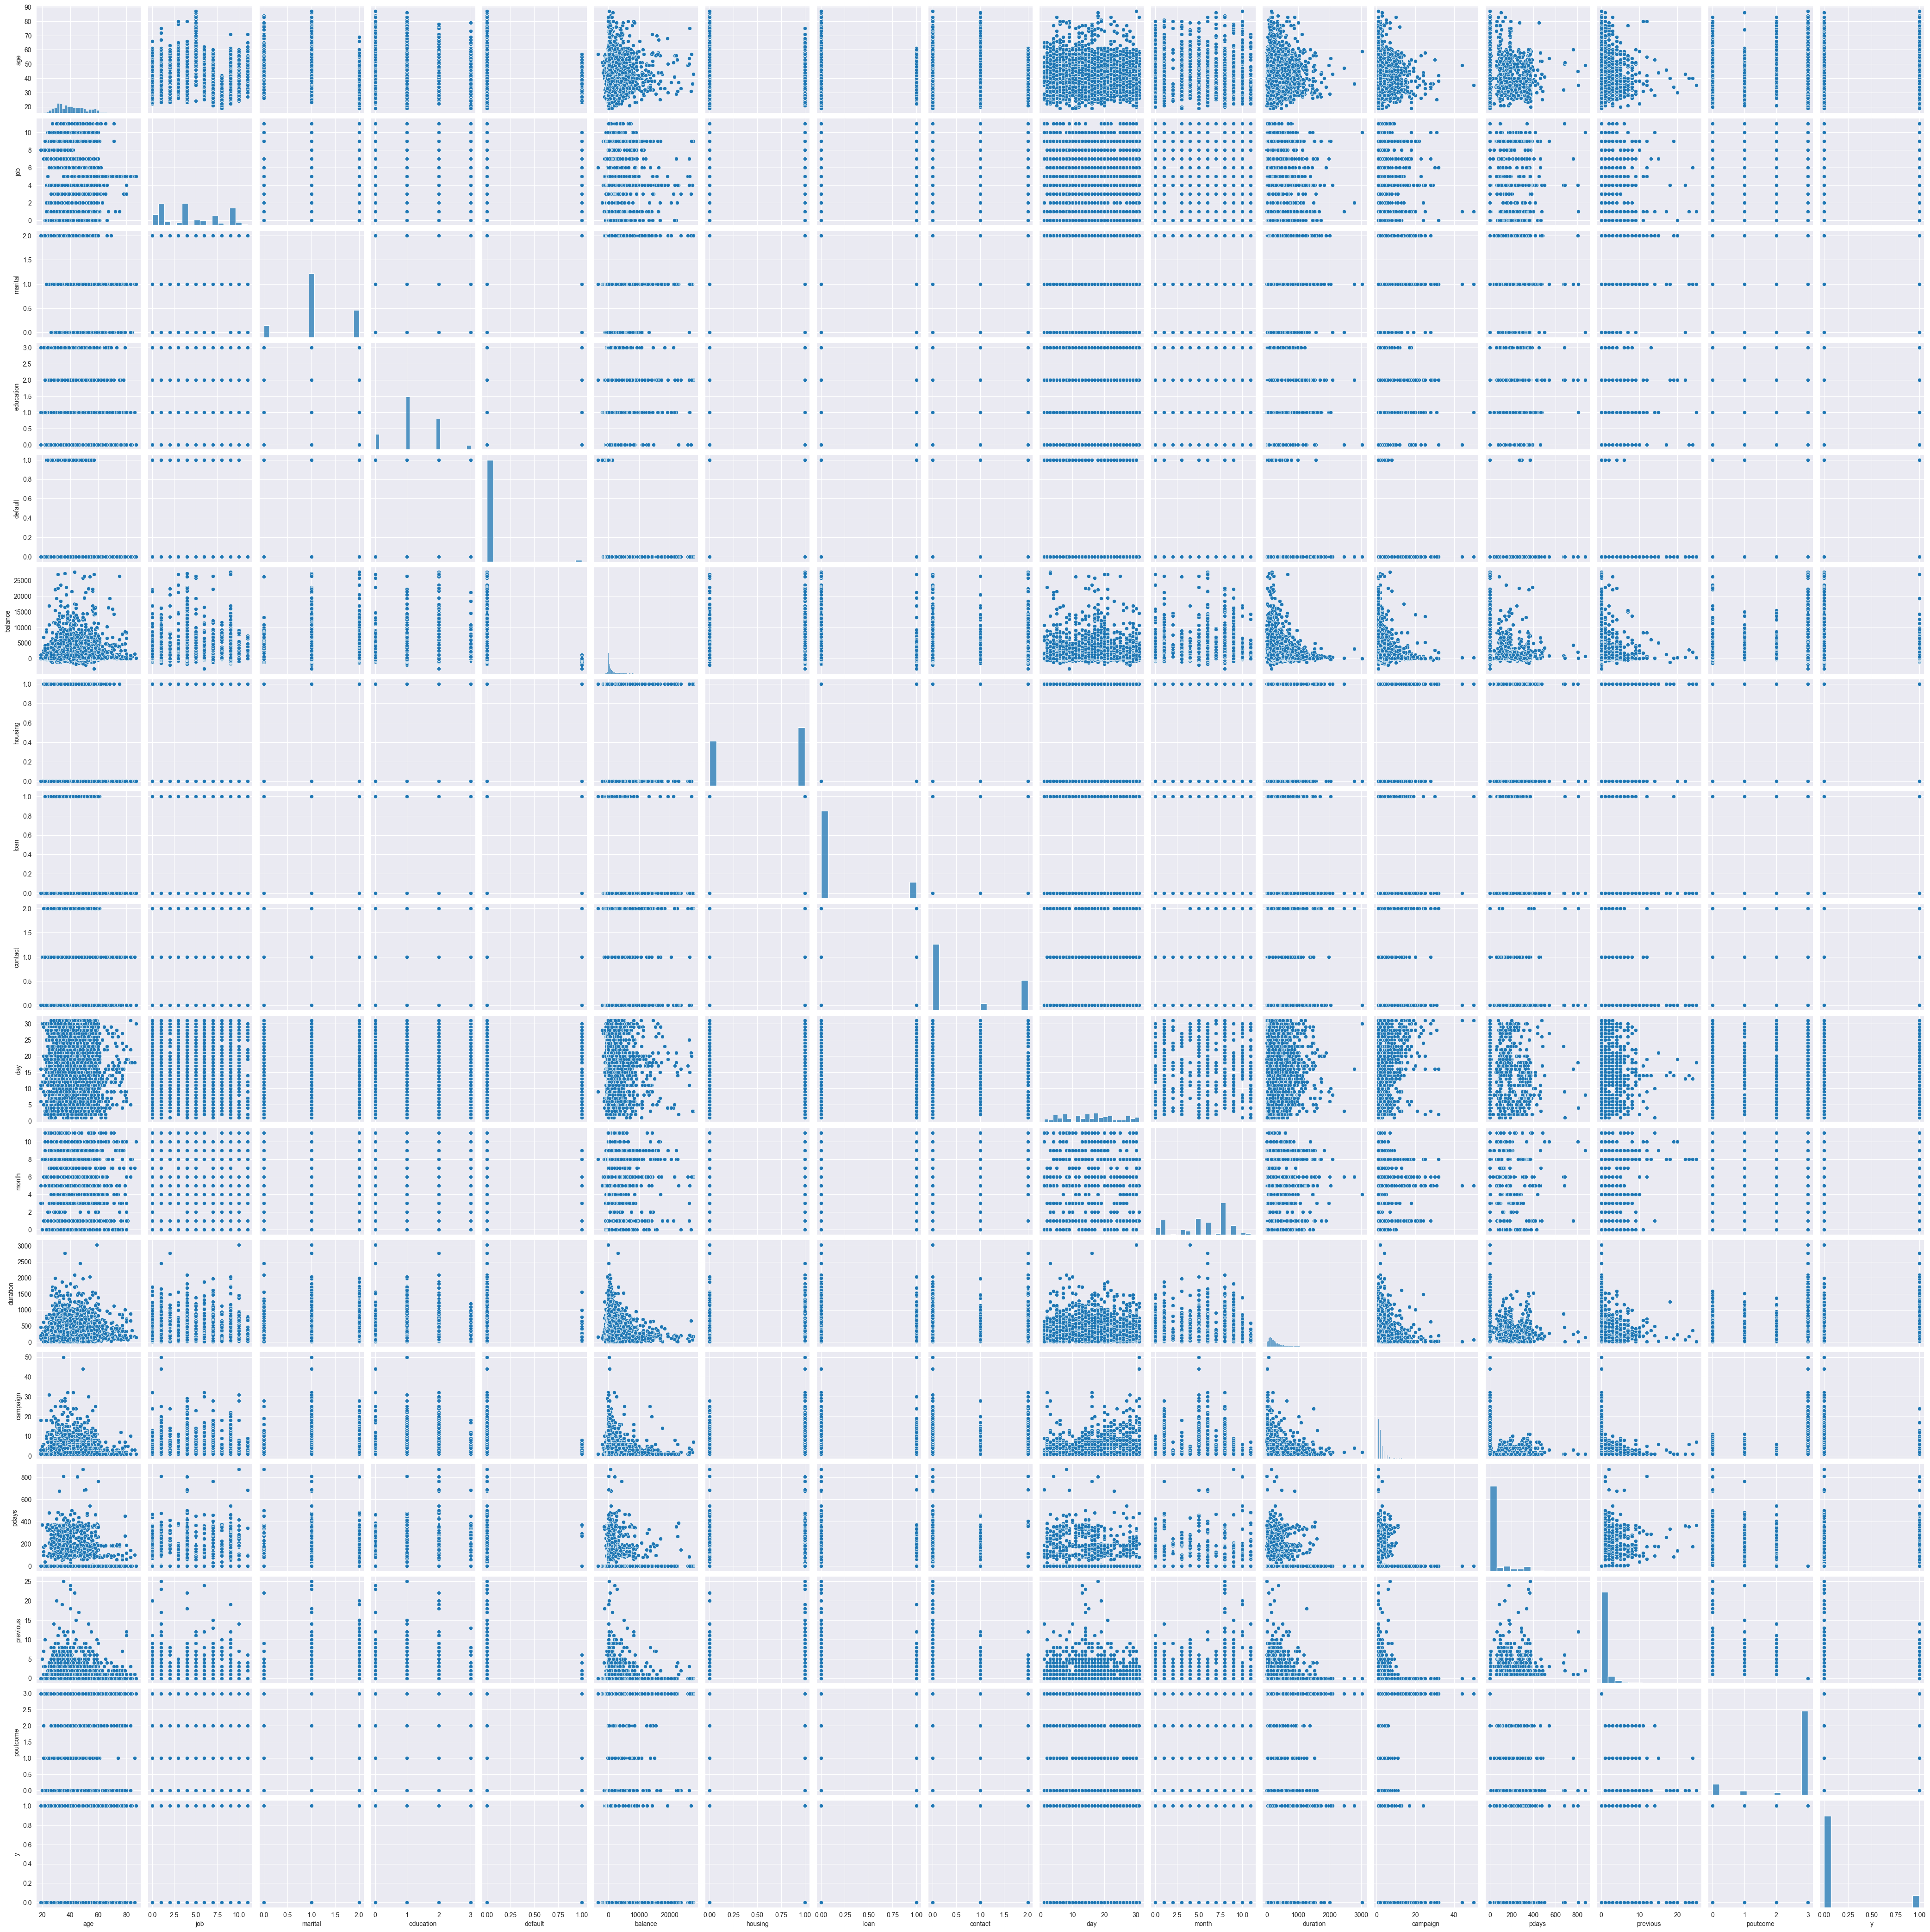

In [47]:
seaborn.pairplot(df)
plt.show()

In [72]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4519.000000,4519.000000,4519.000000,4519.000000,4519.000000,4519.000000,4519.000000,4519.00000,4519.000000,4519.000000,4519.000000,4519.000000,4519.000000,4519.000000,4519.000000,4519.000000,4519.000000
mean,41.165745,4.411595,1.147820,1.231467,0.016818,1398.230361,0.566276,0.15291,0.652578,15.919230,5.540164,263.987387,2.794202,39.784687,0.542819,2.558973,0.115291
std,10.574834,3.256227,0.599774,0.748598,0.128603,2760.217133,0.495643,0.35994,0.901593,8.247332,3.001935,259.911180,3.110358,100.139608,1.693899,0.992227,0.319408
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.00000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.00000,0.000000,9.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.00000,0.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1477.000000,1.000000,0.00000,2.000000,21.000000,8.000000,329.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,87.000000,11.000000,2.000000,3.000000,1.000000,27733.000000,1.000000,1.00000,2.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


Dividing set into data and labels

In [73]:
data = df.iloc[0:,0:-1]
target = df.iloc[0:,-1]

In [74]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3


In [75]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

Standardization

In [76]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)
del scaler

In [26]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03,4.519000e+03
mean,-1.572345e-18,-6.996936e-17,-2.358518e-17,6.839701e-17,1.454419e-17,-2.594369e-17,-7.861725e-18,-7.861725e-18,-7.861725e-17,-5.031504e-17,-5.699751e-17,-3.930863e-18,-4.717035e-18,4.323949e-17,2.790912e-17,-1.961500e-16
std,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00
min,-2.096316e+00,-1.354968e+00,-1.913966e+00,-1.645212e+00,-1.307882e-01,-1.707022e+00,-1.142634e+00,-4.248671e-01,-7.238855e-01,-1.809177e+00,-1.845735e+00,-1.000404e+00,-5.769113e-01,-4.073233e-01,-3.204910e-01,-2.579306e+00
25%,-7.722720e-01,-1.047830e+00,-2.464872e-01,-3.092349e-01,-1.307882e-01,-4.816206e-01,-1.142634e+00,-4.248671e-01,-7.238855e-01,-8.390587e-01,-8.462692e-01,-6.156145e-01,-5.769113e-01,-4.073233e-01,-3.204910e-01,4.445310e-01
50%,-2.048244e-01,-1.264165e-01,-2.464872e-01,-3.092349e-01,-1.307882e-01,-3.457467e-01,8.751709e-01,-4.248671e-01,-7.238855e-01,9.794564e-03,1.531969e-01,-3.039351e-01,-2.553694e-01,-4.073233e-01,-3.204910e-01,4.445310e-01
75%,7.409216e-01,7.949970e-01,1.420991e+00,1.026743e+00,-1.307882e-01,2.854064e-02,8.751709e-01,-4.248671e-01,1.494655e+00,6.161183e-01,8.195077e-01,2.520856e-01,6.617261e-02,-4.073233e-01,-3.204910e-01,4.445310e-01
max,4.334756e+00,2.023548e+00,1.420991e+00,2.362720e+00,7.645948e+00,9.541888e+00,8.751709e-01,2.353677e+00,1.494655e+00,1.828766e+00,1.818974e+00,1.062408e+01,1.517865e+01,8.301483e+00,1.443999e+01,4.445310e-01


In [91]:
banking_train, banking_test, banking_train_target, banking_test_target  =  \
train_test_split(data, target, test_size=0.1, random_state=1010)

In [135]:
print("Training dataset:")
print("banking_train:", banking_train.shape)
print("banking_train_target:", banking_train_target.shape)
print("Testing dataset:")
print("banking_test:", banking_test.shape)
print("banking_test_target:", banking_test_target.shape)

Training dataset:
banking_train: (4067, 16)
banking_train_target: (4067,)
Testing dataset:
banking_test: (452, 16)
banking_test_target: (452,)


LogisticRegression

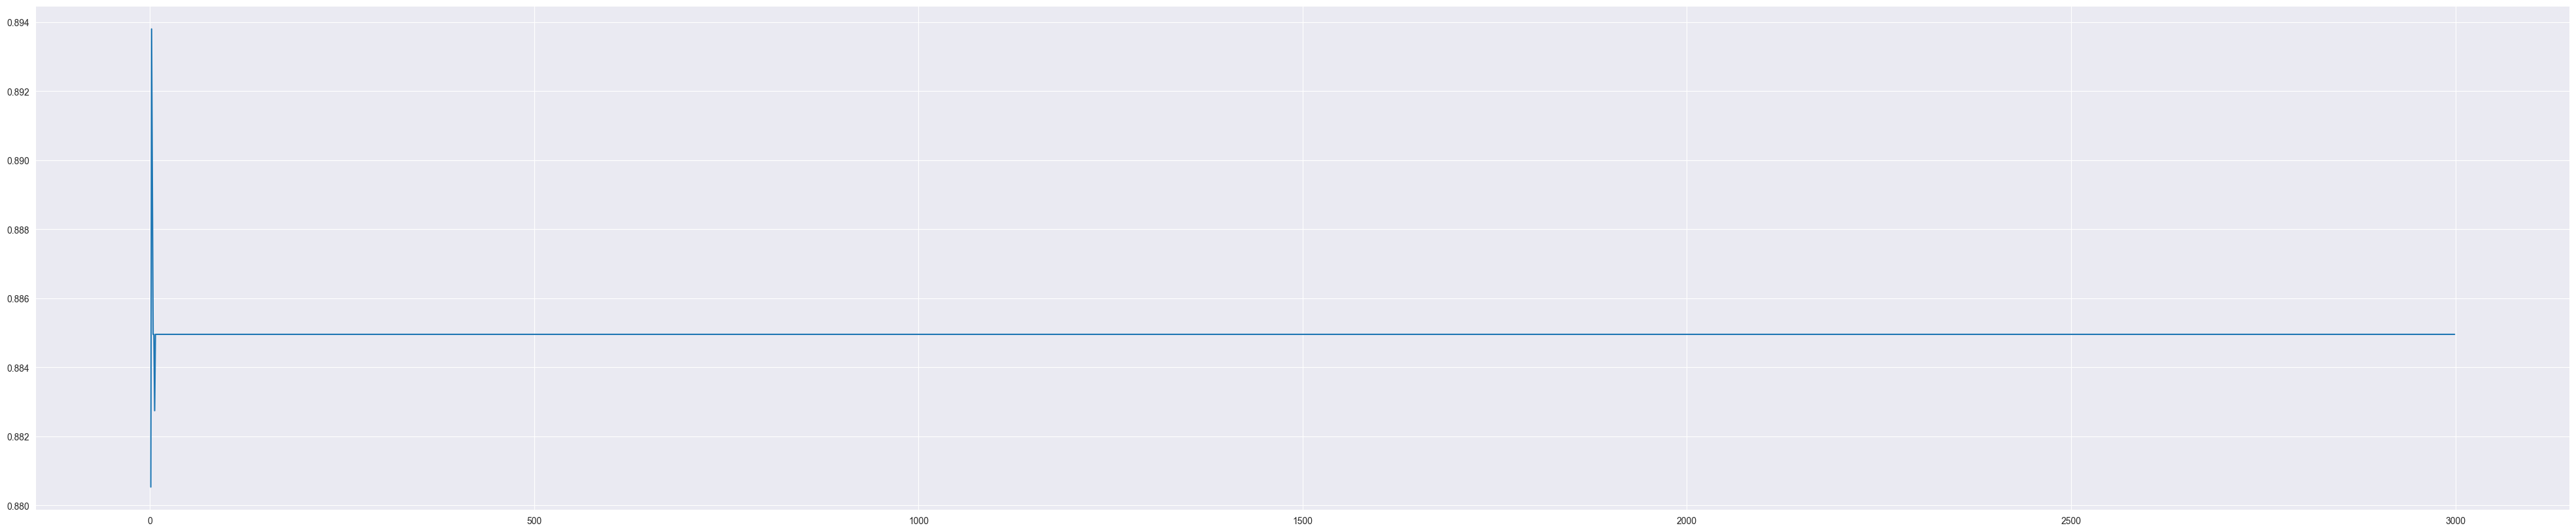

In [93]:
#LogistcRegression - lbfgs
logistic_regression_scores_lbfgs =[]
probes = range(1, 3000, 1)
for i in probes:
    lr = LogisticRegression(solver='lbfgs',max_iter=i)
    lr.fit(banking_train, banking_train_target)
    acc = accuracy_score(banking_test_target, lr.predict(banking_test))
    logistic_regression_scores_lbfgs.append(acc)

plt.plot(probes,logistic_regression_scores_lbfgs)

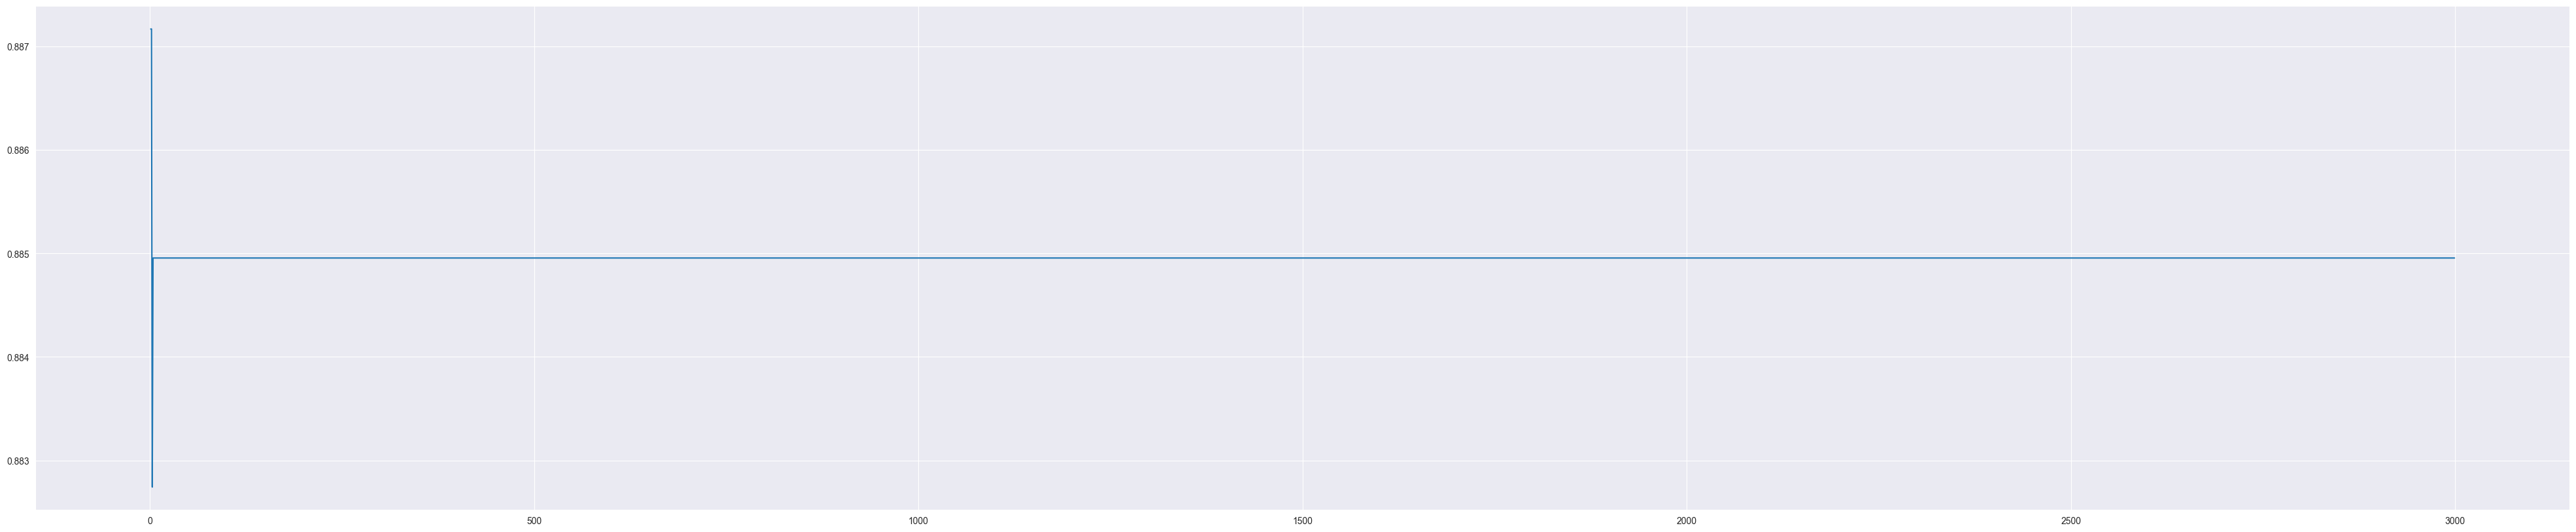

In [94]:
#LogisticRegression - saga
logistic_regression_scores_saga = []
probes = range(1, 3000, 1)
for i in probes:
    lr = LogisticRegression(solver='saga', max_iter=i)
    lr.fit(banking_train, banking_train_target)
    acc = accuracy_score(banking_test_target, lr.predict(banking_test))
    logistic_regression_scores_saga.append(acc)

plt.plot(probes, logistic_regression_scores_saga)

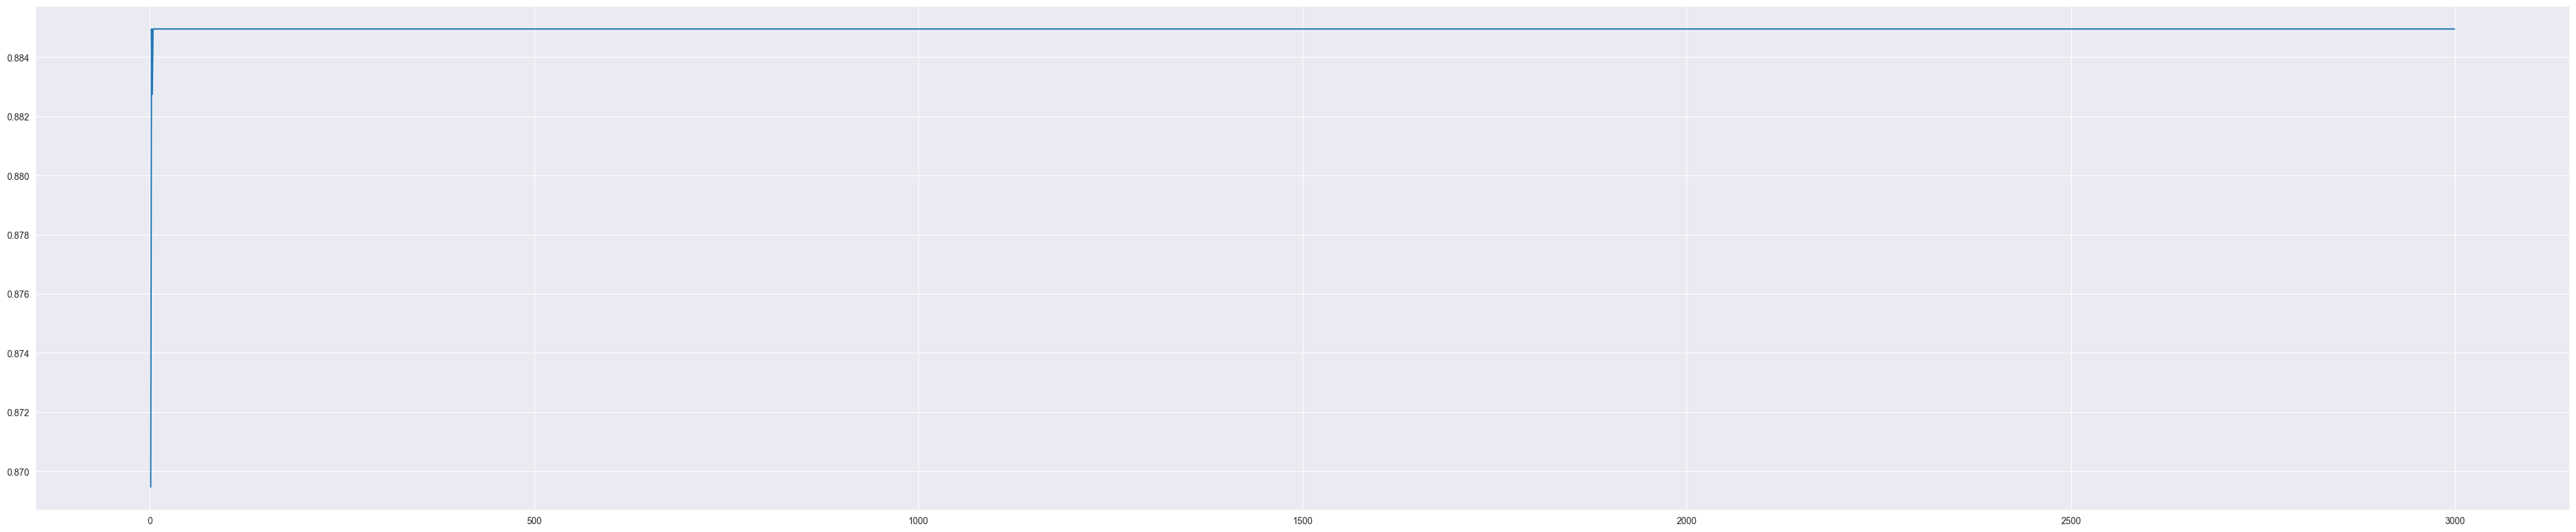

In [95]:
#LogisticRegression - sag
logistic_regression_scores_sag = []
probes = range(1, 3000, 1)
for i in probes:
    lr = LogisticRegression(solver='sag', max_iter=i)
    lr.fit(banking_train, banking_train_target)
    acc = accuracy_score(banking_test_target, lr.predict(banking_test))
    logistic_regression_scores_sag.append(acc)

plt.plot(probes, logistic_regression_scores_sag)

Cross validation

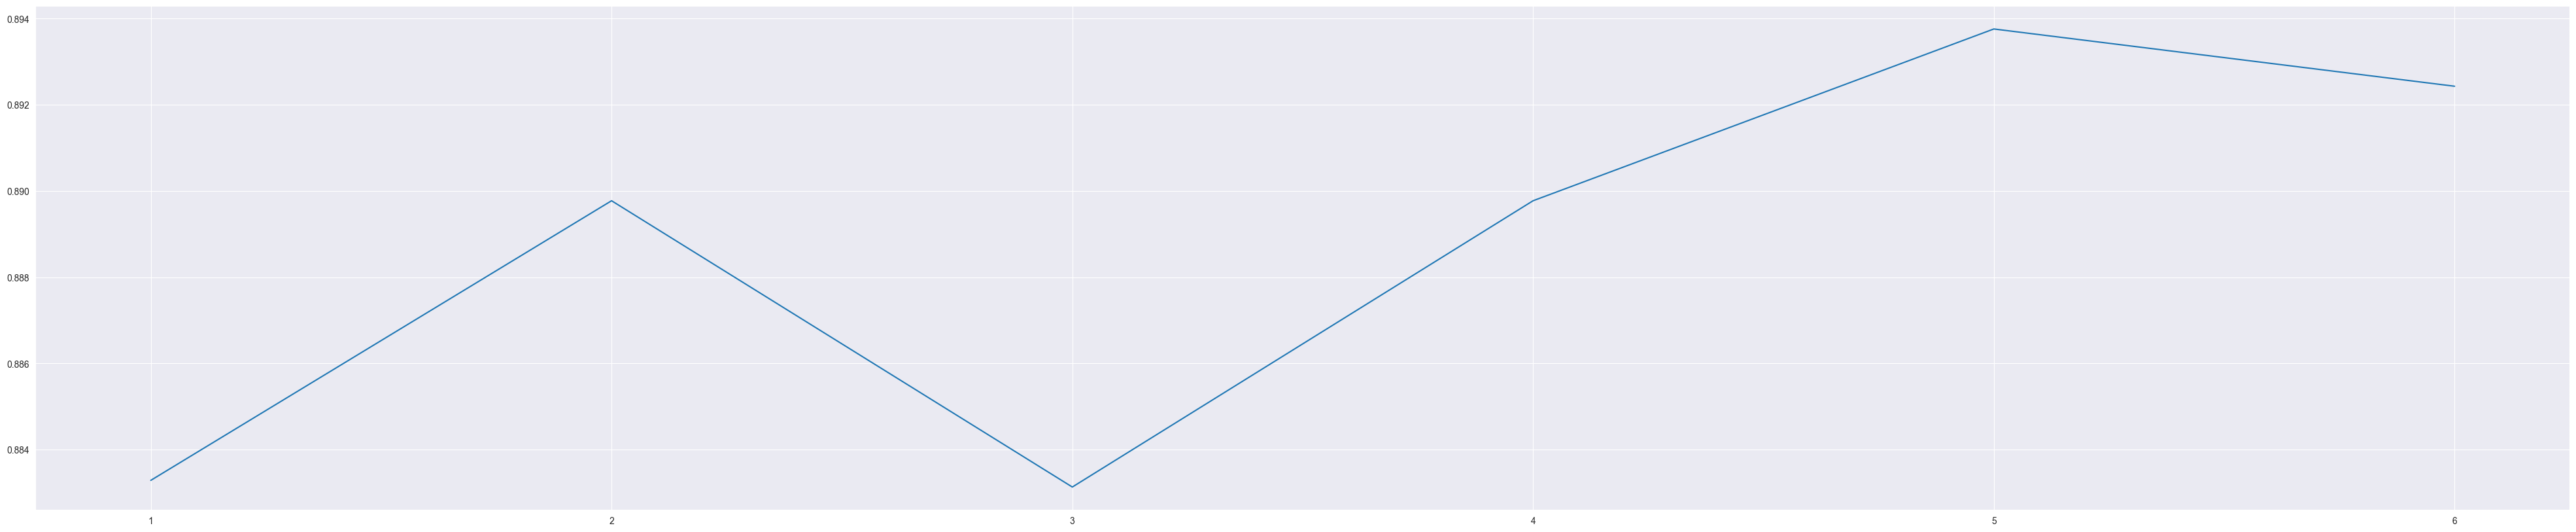

In [112]:
cv_range = 6
scores = cross_val_score(LogisticRegression(), data, target, cv=cv_range)
plt.plot(range(1, cv_range+1), scores)

Funkcje wielomianowe

Polynomial degree: 1
Prediction accuracy: 0.88
Polynomial degree: 2
Prediction accuracy: 0.90
Polynomial degree: 3
Prediction accuracy: 0.87
Polynomial degree: 4
Prediction accuracy: 0.85
Polynomial degree: 5
Prediction accuracy: 0.87


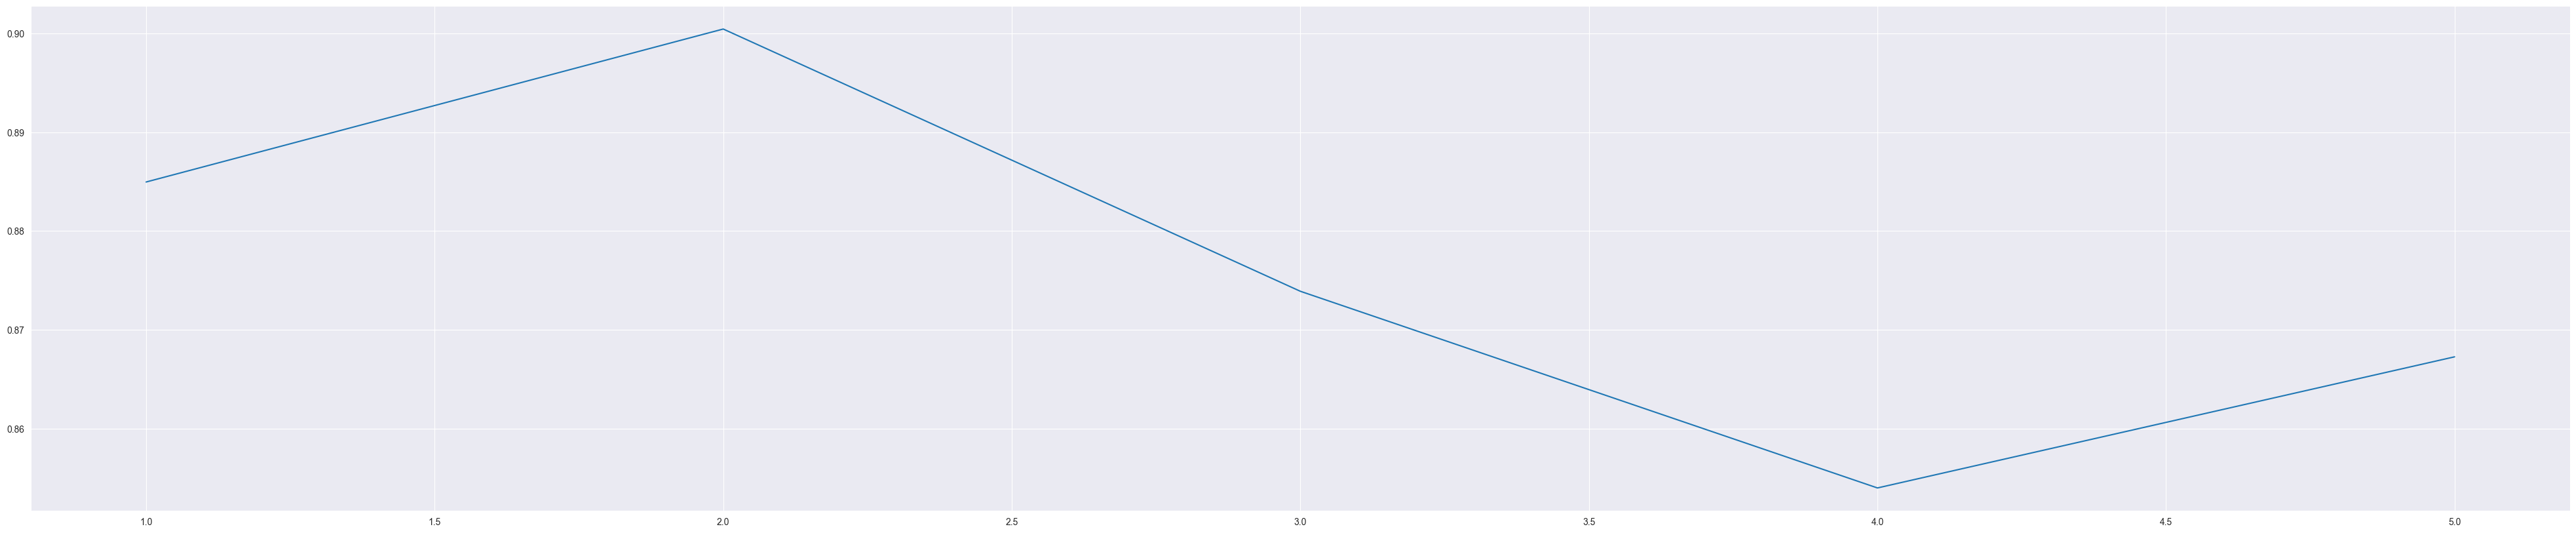

In [114]:
polynomial_features_scores =[]
degrees = range(1, 6)
for i in degrees:
    pf = PolynomialFeatures(i)
    banking_train_poly = pf.fit_transform(banking_train)
    banking_test_poly = pf.fit_transform(banking_test)
    lr_poly = LogisticRegression(max_iter=1000)
    lr_poly.fit(banking_train_poly, banking_train_target)
    acc = accuracy_score(banking_test_target, lr_poly.predict(banking_test_poly))
    print ("Polynomial degree:", i)
    print("Prediction accuracy: %.2f" % acc)
    polynomial_features_scores.append(acc)

plt.plot(degrees,polynomial_features_scores)

Rekursywna eliminacja cech

In [122]:
rfe_scores=[]
features_to_delete = range(10, 160, 10)
pf = PolynomialFeatures(2)
banking_train_poly_rfe = pf.fit_transform(banking_train)
banking_test_poly_rfe = pf.fit_transform(banking_test)

for i in features_to_delete:
    sel_ = RFE(estimator=LogisticRegression(), n_features_to_select=i)
    sel_.fit(banking_train_poly_rfe, banking_train_target)
    acc = accuracy_score(banking_test_target, sel_.predict(banking_test_poly_rfe))
    print ("Features to delete:", i, ",\t ","Prediction accuracy: %.2f" % acc)
    rfe_scores.append(acc)

plt.plot(features_to_delete,rfe_scores)

Features to delete: 10 ,	  Prediction accuracy: 0.89
Features to delete: 20 ,	  Prediction accuracy: 0.89
Features to delete: 30 ,	  Prediction accuracy: 0.88
Features to delete: 40 ,	  Prediction accuracy: 0.88
Features to delete: 50 ,	  Prediction accuracy: 0.89
Features to delete: 60 ,	  Prediction accuracy: 0.88
Features to delete: 70 ,	  Prediction accuracy: 0.88
Features to delete: 80 ,	  Prediction accuracy: 0.89
Features to delete: 90 ,	  Prediction accuracy: 0.89
Features to delete: 100 ,	  Prediction accuracy: 0.90
Features to delete: 110 ,	  Prediction accuracy: 0.90
Features to delete: 120 ,	  Prediction accuracy: 0.90
Features to delete: 130 ,	  Prediction accuracy: 0.90
Features to delete: 140 ,	  Prediction accuracy: 0.90
Features to delete: 150 ,	  Prediction accuracy: 0.90


Ridge

In [141]:
ridge_reg = RidgeClassifier(solver='sag')
ridge_reg.fit(banking_train, banking_train_target)
acc = accuracy_score(banking_test_target, ridge_reg.predict(banking_test))
print ("Prediction accuracy for ridge classifier: %.2f" % acc)


Prediction accuracy for ridge classifier: 0.89


Lasso

In [143]:
lasso_reg = LogisticRegression(penalty='l1', solver='liblinear')
lasso_reg.fit(banking_train, banking_train_target)
acc = accuracy_score(banking_test_target, lasso_reg.predict(banking_test))
print ("Prediction accuracy for ridge classifier: %.2f" % acc)


Prediction accuracy for ridge classifier: 0.88
